In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

train_path = '/content/drive/MyDrive/mlproject2/Housing-project-train-data.csv'
test_path = '/content/drive/MyDrive/mlproject2/Hosuing-project-test-data.csv'
description_path = '/content/drive/MyDrive/mlproject2/Housing-Data-description.txt'

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

print(train_df.shape)
train_df.head()


(1168, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000


In [4]:
# Total and percentage of missing values
missing = train_df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

missing_percentage = (missing / len(train_df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percentage})

missing_data.head(20)  # show top 20 with missing values


,Missing Values,Percentage
PoolQC,1161,99.400685
MiscFeature,1124,96.232877
Alley,1091,93.407534
Fence,931,79.708904
MasVnrType,703,60.188356
FireplaceQu,551,47.174658
LotFrontage,214,18.321918
GarageType,64,5.479452
GarageFinish,64,5.479452
GarageQual,64,5.479452


In [6]:
# Identify data types
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = train_df.select_dtypes(exclude=['object']).columns.tolist()

print("Categorical Columns:", len(categorical_cols))
print("Numerical Columns:", len(numerical_cols))


Categorical Columns: 43
Numerical Columns: 38


In [7]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with median
num_imputer = SimpleImputer(strategy='median')
train_df[numerical_cols] = num_imputer.fit_transform(train_df[numerical_cols])

# Impute categorical columns with "Missing"
cat_imputer = SimpleImputer(strategy='constant', fill_value='Missing')
train_df[categorical_cols] = cat_imputer.fit_transform(train_df[categorical_cols])

# Final check - should return 0
print("Remaining missing values:", train_df.isnull().sum().sum())


Remaining missing values: 0


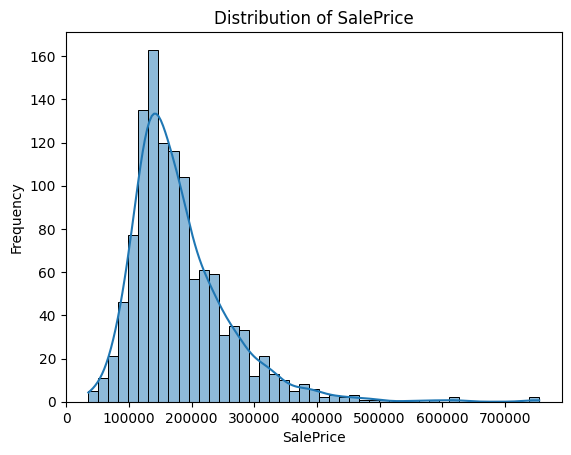

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plot
sns.histplot(train_df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()


OverallQual     0.789185
GrLivArea       0.707300
GarageCars      0.628329
GarageArea      0.619000
TotalBsmtSF     0.595042
1stFlrSF        0.587642
FullBath        0.554988
TotRmsAbvGrd    0.528363
YearBuilt       0.514408
YearRemodAdd    0.507831
Name: SalePrice, dtype: float64


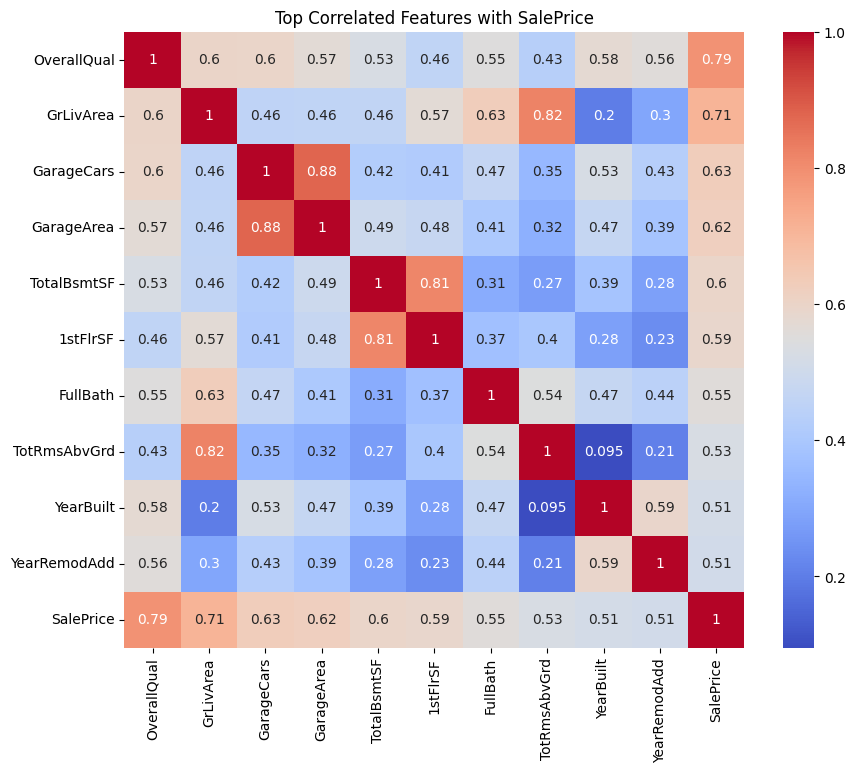

In [9]:
# Correlation matrix for numerical features
correlation_matrix = train_df[numerical_cols].corr()

# Top 10 features most correlated with SalePrice
top_corr = correlation_matrix['SalePrice'].sort_values(ascending=False)[1:11]
print(top_corr)

# Heatmap of top correlated features
top_features = top_corr.index.tolist() + ['SalePrice']
plt.figure(figsize=(10, 8))
sns.heatmap(train_df[top_features].corr(), annot=True, cmap='coolwarm')
plt.title('Top Correlated Features with SalePrice')
plt.show()


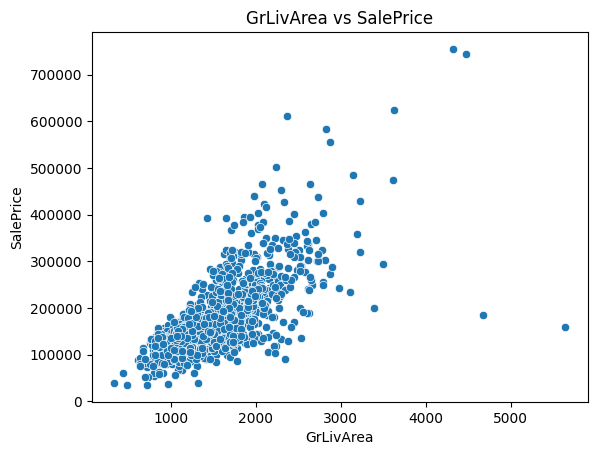

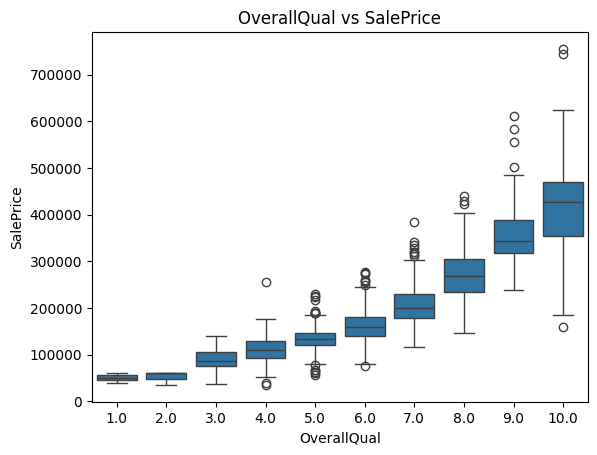

In [10]:
# Example: GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train_df)
plt.title('GrLivArea vs SalePrice')
plt.show()

# Example: OverallQual vs SalePrice
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('OverallQual vs SalePrice')
plt.show()


In [11]:
import numpy as np

# Apply log1p to reduce skewness
train_df['SalePrice'] = np.log1p(train_df['SalePrice'])


In [13]:
test_df = pd.read_csv('/content/drive/MyDrive/mlproject2/Hosuing-project-test-data.csv')
test_ids = test_df['Id']

# Store target and drop from training set
y = train_df['SalePrice']
train_df.drop(['SalePrice'], axis=1, inplace=True)

# Combine datasets
full_data = pd.concat([train_df, test_df], axis=0)
full_data.drop(['Id'], axis=1, inplace=True)


In [14]:
# Recalculate categorical/numerical cols
cat_cols = full_data.select_dtypes(include=['object']).columns
num_cols = full_data.select_dtypes(exclude=['object']).columns

# Imputation
from sklearn.impute import SimpleImputer

full_data[cat_cols] = SimpleImputer(strategy='constant', fill_value='Missing').fit_transform(full_data[cat_cols])
full_data[num_cols] = SimpleImputer(strategy='median').fit_transform(full_data[num_cols])


In [15]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# One-hot encode categorical features
full_data = pd.get_dummies(full_data)

# Scale numerical features
scaler = StandardScaler()
full_data[num_cols] = scaler.fit_transform(full_data[num_cols])


In [16]:
# Split back into train and test
X = full_data.iloc[:len(train_df), :]
X_test = full_data.iloc[len(train_df):, :]


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.4/322.4 MB 3.4 MB/s eta 0:00:00


In [20]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=10),
    'Lasso': Lasso(alpha=0.001),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    mse = mean_squared_error(y_valid, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_valid, preds)

    results[name] = {'R2': r2, 'MSE': mse, 'RMSE': rmse}
    print(f"{name} — R²: {r2:.4f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}")


Linear Regression — R²: 0.7902, MSE: 0.03, RMSE: 0.18
Ridge — R²: 0.8498, MSE: 0.02, RMSE: 0.15
Lasso — R²: 0.8501, MSE: 0.02, RMSE: 0.15
Random Forest — R²: 0.8358, MSE: 0.03, RMSE: 0.16
XGBoost — R²: 0.8372, MSE: 0.03, RMSE: 0.16


In [23]:
test_df = pd.read_csv("/content/drive/MyDrive/mlproject2/Hosuing-project-test-data.csv")


In [24]:
test_ids = test_df['Id']
test_df.drop('Id', axis=1, inplace=True)

# Fill missing values and align columns with training data
test_df = test_df.fillna(0)  # or use same imputers as before
test_df = pd.get_dummies(test_df)

# Align with training data columns
test_df = test_df.reindex(columns=X.columns, fill_value=0)


In [25]:
test_preds = models['Lasso'].predict(test_df)

# Since you log-transformed SalePrice earlier, apply inverse transform
import numpy as np
test_preds = np.expm1(test_preds)


In [26]:
submission = pd.DataFrame({
    'Id': test_ids,
    'SalePrice': test_preds
})

submission.to_csv('lasso_submission.csv', index=False)
print(" Submission file saved as lasso_submission.csv")


 Submission file saved as lasso_submission.csv


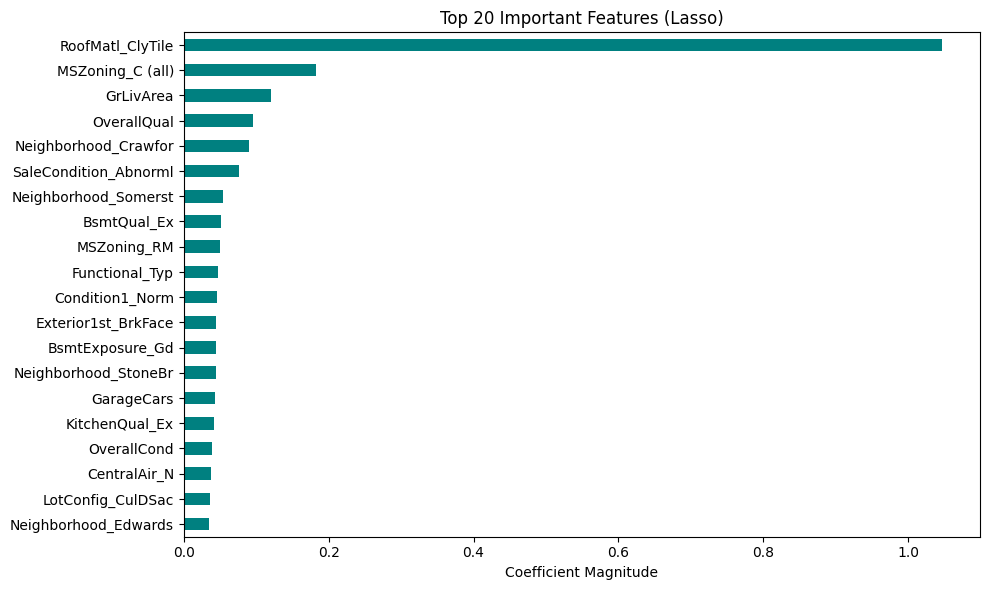

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Get coefficients
lasso_coef = models['Lasso'].coef_
lasso_importance = pd.Series(lasso_coef, index=X.columns)

# Top 20
top_features = lasso_importance.abs().sort_values(ascending=False).head(20)

# Plot
plt.figure(figsize=(10, 6))
top_features.sort_values().plot(kind='barh', color='teal')
plt.title("Top 20 Important Features (Lasso)")
plt.xlabel("Coefficient Magnitude")
plt.tight_layout()
plt.show()
